In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats 

In [3]:
data = pd.read_csv("tips.csv")

In [4]:
data

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3.506810e+15,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6.011890e+15,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4.375220e+12,Sat17


In [8]:
tb_series = data["total_bill"]
print(tb_series.head())

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64


In [9]:
if os.path.exists("deletethistip-1.csv"):
    os.remove("deletethistip-1.csv")

In [10]:
data.to_csv("deletethistip-1.csv", index=False)

In [11]:
mu,sd  = tb_series.mean(),tb_series.std()

In [12]:
print(mu,sd)

19.78594262295082 8.902411954856856


In [13]:
# Calculate z-score for each value
z_scores = (tb_series - mu) / sd

(array([0.00171695, 0.0103017 , 0.02232036, 0.04979156, 0.05322546,
        0.06352717, 0.04807461, 0.03948986, 0.03090511, 0.02232036,
        0.0171695 , 0.01545255, 0.00858475, 0.01201865, 0.00515085,
        0.0068678 , 0.00171695, 0.0034339 , 0.00515085, 0.00171695]),
 array([ 3.07 ,  5.457,  7.844, 10.231, 12.618, 15.005, 17.392, 19.779,
        22.166, 24.553, 26.94 , 29.327, 31.714, 34.101, 36.488, 38.875,
        41.262, 43.649, 46.036, 48.423, 50.81 ]),
 <BarContainer object of 20 artists>)

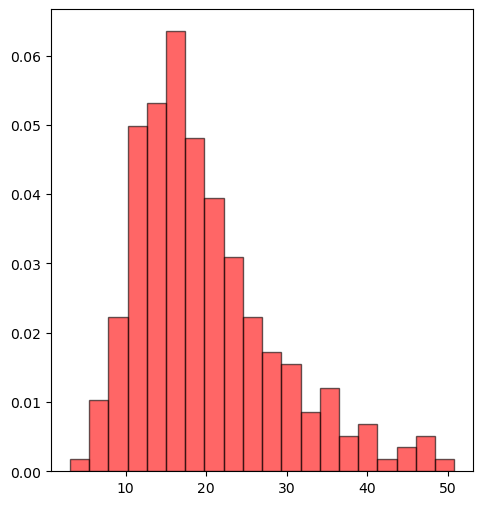

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(tb_series, bins=20, density=True, alpha=0.6, color='r', edgecolor='black')

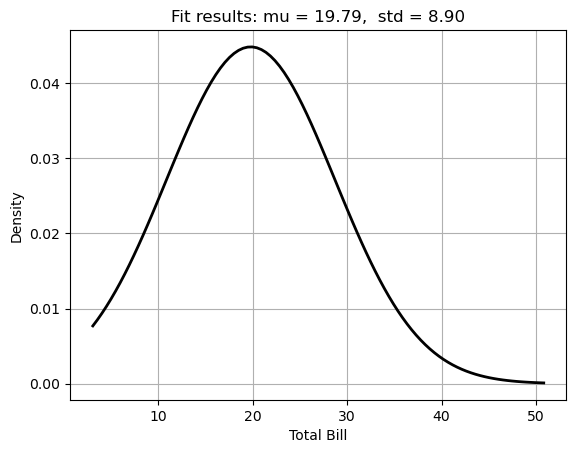

In [24]:
x = np.linspace(tb_series.min(), tb_series.max(), 100)
p = stats.norm.pdf(x, mu, sd)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sd)
plt.title(title)
plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.grid(True)